<a href="https://colab.research.google.com/github/owgee/general-ml/blob/main/Imbalanced_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dealing with Imbalanced Datasets

When dealing with imbalanced datasets in classification tasks, we often use various sampling techniques to address the imbalance. These techniques can be categorized into oversampling, undersampling, and synthetic sampling.

The **oversampling** technique involves increasing the number of instances in the minority class by randomly replicating them until the majority and minority class instances are balanced or nearly balanced.

The **undersampling** technique reduces the number of instances in the majority class by randomly removing them until the majority and minority class instances are balanced or nearly balanced.

**SMOTE** addresses the class imbalance by augmenting the dataset with synthetic instances rather than by oversampling (which can lead to overfitting) or undersampling (which can lead to loss of information). For every instance in the minority class, SMOTE selects 'k' nearest neighbors and generates synthetic instances between the chosen instance and its neighbors. If you are interested in the details of these technique, please read N. V. Chawla, K. W. Bowyer, L. O.Hall, W. P. Kegelmeyer, “SMOTE: synthetic minority over-sampling technique,” Journal of artificial intelligence research, 321-357, 2002.

When deciding which method to use, it's essential to consider the dataset's size and the degree of imbalance.

**Dataset's Size**:

*Small Datasets*: When working with small datasets, undersampling may not be an ideal choice because it further reduces the data size, leading to potential loss of vital information. In contrast, oversampling or synthetic methods like SMOTE might be more suitable since they can increase the sample size and provide the model with more examples to learn from.

*Large Datasets*: For extensive datasets, undersampling can be particularly useful. It can make the training process faster by reducing the data size without causing a significant loss of information. Oversampling a large dataset can be computationally expensive, as it might make the dataset much larger, extending the training time.

**Degree of Imbalance**:

*Severe Imbalance*: If the minority class is extremely underrepresented, simply undersampling the majority class might not be effective. This is because the model might still have too few examples of the minority class to learn from. In such cases, oversampling or SMOTE can be more effective as they amplify the minority class's presence.

*Moderate Imbalance*: In cases where the imbalance is not too pronounced, undersampling might suffice. It can balance the classes without the risk of overfitting, which can be a concern with oversampling techniques.



## Example 1: Binary Target Variable

We first import necessary libraries and load the dataset.

pandas is imported for data manipulation and analysis.
io provides the capability to handle streams (like reading from memory).
From google.colab, the files module is imported to enable the upload functionality specifically for Google Colab notebooks.
Uploading Files:

files.upload() opens an interactive widget in Google Colab that allows you to upload files from your local machine to the Colab environment. After uploading, the method returns a dictionary (uploaded) in which the keys are filenames and the values are the corresponding file data in byte format.
Reading Uploaded File into a DataFrame:

The io.BytesIO(uploaded['creditcard.csv']) segment reads the uploaded file (in this case, assumed to be 'creditcard.csv') from its byte format in memory into a stream.
pd.read_csv() then reads this stream and converts the CSV data into a Pandas DataFrame named data.
Displaying Class Distribution:

The print(data['Class'].value_counts()) segment displays the frequency distribution of the 'Class' column in the DataFrame. In the context of this code, it's likely that 'Class' refers to labels or outcomes, and the code is showing how many occurrences there are for each unique class in the dataset. This can be particularly useful for understanding class imbalance in datasets, such as for fraud detection scenarios where fraudulent transactions are often much less frequent than legitimate ones.

In [ ]:
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()


data = pd.read_csv(io.BytesIO(uploaded['creditcard.csv']))
print(data['Class'].value_counts())


Saving creditcard.csv to creditcard.csv
0    284315
1       492
Name: Class, dtype: int64


Then, we prepare the data for machine learning by splitting it into training and testing sets.



In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('Class', axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Then, we proceed with addressing class imbalance in a dataset using the random under-sampling, the oversampling and SMOTE techniques.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)


In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)


Lastly, we assess the performance of a logistic regression model on the initial imbalanced dataset and the various datasets that underwent different resampling techniques to become balanced.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

model = LogisticRegression(max_iter=1000)

def evaluate_model(X_train, y_train, X_test, y_test, description):
    model.fit(X_train, y_train)
    # Get probabilities for the positive class
    y_prob = model.predict_proba(X_test)[:,1]
    # Compute AUC
    auc = roc_auc_score(y_test, y_prob)
    y_pred = model.predict(X_test)
    print(description)
    #print("Classification Report:\n", classification_report(y_test, y_pred))
    print("AUC:", auc)
    print("--------------------------")

# Without resampling
evaluate_model(X_train, y_train, X_test, y_test, "Without Resampling:")

# Random under-sampling
evaluate_model(X_rus, y_rus, X_test, y_test, "Random Under-sampling:")

# Random over-sampling
evaluate_model(X_ros, y_ros, X_test, y_test, "Random Over-sampling:")

# SMOTE
evaluate_model(X_smote, y_smote, X_test, y_test, "SMOTE:")


Without Resampling:
AUC: 0.941461295407302
--------------------------
Random Under-sampling:
AUC: 0.970818397350499
--------------------------
Random Over-sampling:
AUC: 0.971236868058985
--------------------------
SMOTE:
AUC: 0.974296531358745
--------------------------


## Example 2: Three-outcome categorical target variable

The following code analyzes the distribution of classes in a multi-class imbalanced dataset and address this imbalance using various balancing techniques.

It begins by generating a synthetic dataset with three classes, with imbalances introduced through specified weights. This dataset mimics real-world scenarios where certain classes (or outcomes) are underrepresented. To address this imbalance, the code employs various resampling techniques, including Random Under-sampling, Random Over-sampling, and Synthetic Minority Over-sampling Technique (SMOTE). The performance of the model is evaluated on the test data without and with using each of the balancing techniques.

For visualization purposes, the code uses a function called plot_histogram. This function displays histograms representing the class distribution. It has been enhanced to allow customization of the plot's size and the fontsize of the x-axis label. By using this function, the distribution of classes can be visually inspected before and after applying each resampling technique. This visualization aids in understanding how each method modifies the dataset's structure.

Lastly, the code evaluates the performance of a multinomial logistic regression model on these resampled datasets using the One-vs-One (OvO) approach to compute the Area Under the Curve (AUC). AUC is a metric that helps assess the model's ability to differentiate between classes and can be adjusted to multi-class datasets.

In essence, the code provides a comprehensive exploration of class imbalance in a multi-class setting, from visualization to modeling and evaluation.

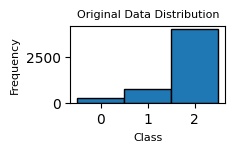

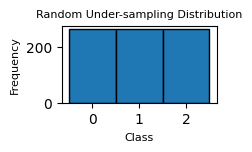

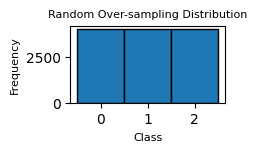

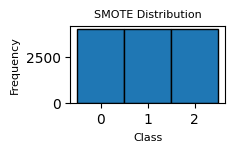

Without Resampling:
AUC (OvO): 0.8202741449268122
--------------------------
Random Under-sampling:
AUC (OvO): 0.8466198091347986
--------------------------
Random Over-sampling:
AUC (OvO): 0.8571795908722798
--------------------------
SMOTE:
AUC (OvO): 0.8544255203096146
--------------------------


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Synthetic Data
X, y = make_classification(n_samples=5000, n_features=20, n_informative=15, n_redundant=5, n_classes=3, weights=[0.05, 0.15, 0.8], random_state=42)

# Function to plot histograms
def plot_histogram(y, title,width=2, height=1):
    plt.figure(figsize=(width, height))
    plt.hist(y, bins=np.arange(4) - 0.5, edgecolor='k', align='mid')
    plt.xlabel('Class', fontsize=8)
    plt.ylabel('Frequency', fontsize=8)
    plt.title(title, fontsize=8)
    plt.xticks([0, 1, 2])
    plt.show()

# Plot original data distribution
plot_histogram(y, "Original Data Distribution")

# Balancing Techniques
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)
plot_histogram(y_rus, "Random Under-sampling Distribution")

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)
plot_histogram(y_ros, "Random Over-sampling Distribution")

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
plot_histogram(y_smote, "SMOTE Distribution")

# Model Evaluation Function
def evaluate_multi_class(X_train, y_train, X_test, y_test, description):
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
    model.fit(X_train, y_train)

    # Predict probabilities
    y_prob = model.predict_proba(X_test)

    # Compute AUC for multi-class
    auc = roc_auc_score(y_test, y_prob, multi_class='ovo')

    print(description)
    print("AUC (OvO):", auc)
    print("--------------------------")

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Evaluating models
evaluate_multi_class(X_train, y_train, X_test, y_test, "Without Resampling:")
evaluate_multi_class(X_rus, y_rus, X_test, y_test, "Random Under-sampling:")
evaluate_multi_class(X_ros, y_ros, X_test, y_test, "Random Over-sampling:")
evaluate_multi_class(X_smote, y_smote, X_test, y_test, "SMOTE:")
